In [7]:
from project_wide.compare_plot_traces import comparePlotTraces
from project_wide.compare_activity_analyse import compareTraces

In [8]:
simroot = 'pdc/Level4/pdc_network/simulation/'
fn = [simroot + 'network-voltage-ACh-burst-network-level4.csv',\
      simroot + 'network-voltage-ACh-pause-network-level4.csv',\
      simroot + 'network-voltage-DA-ACh-burst-network-level4.csv',\
      simroot + 'network-voltage-DA-network-level4.csv']




root = 'pdc/Level4/pdc_network/'
nf = [root + 'network-synapses.hdf5',\
     root + 'network-synapses.hdf5',\
     root + 'network-synapses.hdf5',\
     root + 'network-synapses.hdf5']
kl = compareTraces(fileNames=fn,\
                      networkFiles=nf,labels=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],colours=['red','green', 'purple', 'blue'])



Loading 10100 neurons with 3191618 synapses and 387 gap junctions
Loading 10100 neurons with 3191618 synapses and 387 gap junctions
Loading 10100 neurons with 3191618 synapses and 387 gap junctions
Loading 10100 neurons with 3191618 synapses and 387 gap junctions


In [ ]:
nl = comparePlotTraces(fileNames=fn,\
                      networkFiles=nf,labels=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],colours=['red','green', 'purple', 'blue'],save_dir='Compare-network/')

## <span style="color:red" >  **ACh burst**</span>
## <span style="color:black" >  **ACh pause**</span>

In [1]:
%matplotlib notebook
plot_offset = 0  # -0.2
skip_time = 0  # 0.5
num_traces_max = 10

nl.plotTraceNeuronType(neuronType="dSPN", nTraces=100, offset=plot_offset, skipTime=skip_time)


NameError: name 'nl' is not defined

In [9]:
import elephant as elp
import neo
import quantities as pq
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def firing_frequency(obj_loaded_traces,type_cell='dSPN'):

    data = obj_loaded_traces.get_traces(neuronType=type_cell)
    data_spikes = dict()
    data_average = dict()
    for ctr, network in data.items():
        data_spikes.update({ctr : dict()})
        data_average.update({ctr : dict()})
        for k, volt in network.items():
            neov = neo.AnalogSignal(volt, units='V',sampling_period = 5e-4 * pq.s)
            spike = elp.spike_train_generation.threshold_detection(neov)
            data_spikes[ctr].update({k : spike})

            if len(spike) != 0:
                av = elp.statistics.mean_firing_rate(spike,t_start=0.5 * pq.s, t_stop= 2 *pq.s)
                
                data_average[ctr].update({k : av})
            
    return data_spikes, data_average

In [11]:
def spike_delays(data_spikes,start_stim):
    
    delays_dict = dict()
    for r, data in data_spikes.items():
        delays = list()
        for k, st in data.items():
            if len(st.tolist()) > 0 and len(st.tolist())>0:
                delay = min(st.tolist()) - start_stim *pq.s
                delays.append(delay)
        delays_dict.update({r : delays}) 
                
    return delays_dict

def plot_spike_delays(delays_dict,labels_v=['V0', 'V1'],exp_title=None):

    fig, ax = plt.subplots()
    pos = 0
    for k, delays in delays_dict.items():
        ax.bar([pos], np.array(delays).mean(),yerr=np.array(delays).std(), align='center',alpha=0.5, ecolor='black', capsize=10,width=0.5)
        #ax.scatter(np.random.rand(len(delays))*0.01 -0.005 + pos ,delays)
        pos=pos+1

    ax.set_ylabel('Delays (s)')
    ax.set_title('Delays (s)')
    ax.set_xticks([*delays_dict.keys()])
    #ax.set_xticklabels(labels_v)
    plt.title(exp_title)
    plt.tight_layout()
    plt.savefig(exp_title+'_delays.svg')
    plt.show()

In [12]:
def plot_mean_frequency(data_average,labels_v=['V0', 'V1'],exp_title=None):
    
    fig, ax = plt.subplots()
    pos = 0
    for k, average in data_average.items():
        ax.bar([pos], [np.array([*average.values()]).mean()],yerr=[np.array([*average.values()]).std()], align='center', alpha=0.5, ecolor='black', capsize=10)
        #ax.scatter(np.random.rand(len([*average.values()]))*0.01 -0.005 + pos ,[*average.values()])
        pos=pos+1
        
    ax.set_ylabel('Mean frequency (Hz)')
    ax.set_title('Mean frequency (Hz)')
    ax.set_xticks([*data_average.keys()])
    ax.set_xticklabels(labels_v)


    plt.tight_layout()
    plt.title(exp_title)
    plt.savefig(exp_title+'_mean_freuquency.svg')
    plt.show()

<IPython.core.display.Javascript object>


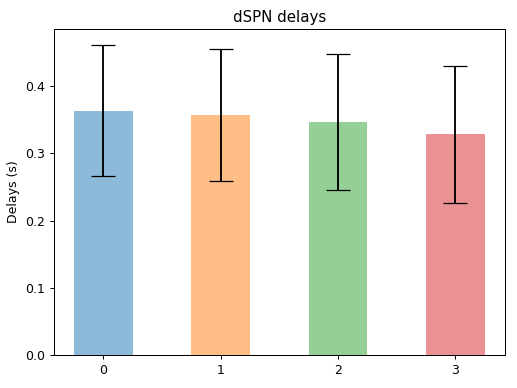

<IPython.core.display.Javascript object>


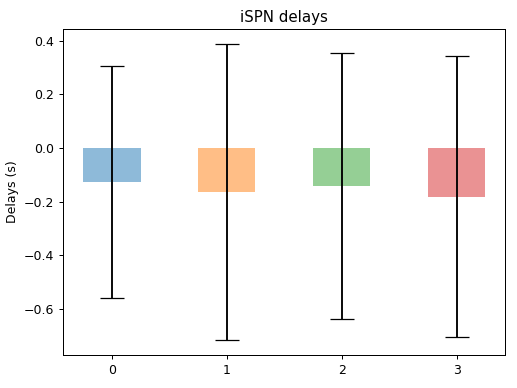

<IPython.core.display.Javascript object>


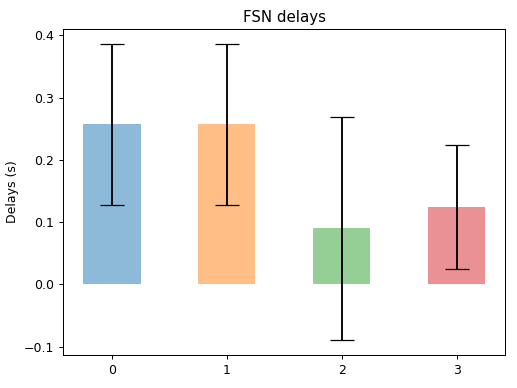

In [13]:
spikes_dSPN, average_dSPN = firing_frequency(kl,type_cell='dSPN')
delays_dSPN = spike_delays(spikes_dSPN,start_stim=1)
plot_spike_delays(delays_dSPN,labels_v=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],exp_title='dSPN delays')

spikes_iSPN, average_iSPN = firing_frequency(kl,type_cell='iSPN')
delays_iSPN = spike_delays(spikes_iSPN,start_stim=1)
plot_spike_delays(delays_iSPN,labels_v=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],exp_title='iSPN delays')

spikes_FSN, average_FSN = firing_frequency(kl,type_cell='FSN')
delays_FSN = spike_delays(spikes_FSN,start_stim=1)
plot_spike_delays(delays_FSN,labels_v=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],exp_title='FSN delays')

In [ ]:
plot_mean_frequency(average_dSPN,labels_v=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],exp_title='dSPN Mean frequency during activation')
plot_mean_frequency(average_iSPN,labels_v=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],exp_title='iSPN Mean frequency during activation')
plot_mean_frequency(average_FSN,labels_v=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],exp_title='FSN Mean frequency during activation')

In [ ]:
import quantities as pq
from elephant import statistics, kernels
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from viziphant.statistics import plot_instantaneous_rates_colormesh

def plot_colormap_frequency(data_spikes):
    np.random.seed(6)
    for k, data in data_spikes.items():
        spiketrains = [*data.values()]
        kernel = kernels.GaussianKernel(sigma=100 * pq.ms)
        rates = statistics.instantaneous_rate(spiketrains,
                                      sampling_period=5e-4 * pq.s,
                                      kernel=kernel)
        plot_instantaneous_rates_colormesh(rates)
    plt.show()

In [ ]:
plot_colormap_frequency(spikes_dSPN)

In [ ]:
plot_colormap_frequency(spikes_iSPN)

In [ ]:
def depolarisation_response(obj_loaded_traces,type_cell,start=1,end=2):
    data_dict = obj_loaded_traces.get_traces(neuronType=type_cell)
    depol = dict()
    for k, data in data_dict.items():
        for t, voltages in data.items():
            depolarisation = list()
            if max(voltages) < 0:
                depolarisation.append(voltages[int(start/5e-4) : int(end/5e-4)] - data_dict[0][t][int(start/5e-4) : int(end/5e-4)])
                
        depol.update({k : depolarisation})
                
    return depol


In [ ]:
def plot_membrane_potentials(obj_loaded_traces,type_cell,exp_title,start=1,end=2,labels=None,colors=None):
    fig, ax = plt.subplots()
    data_dict = obj_loaded_traces.get_traces(neuronType=type_cell)
    depol = dict()
    for k, data in data_dict.items():
        ax.plot([],c=colors[k],label=labels[k])
        for t, voltages in data.items():
            if max(voltages)<-0.04:
                ax.plot(voltages,c=colors[k])
    plt.tight_layout()
    plt.savefig(exp_title+'_voltages.svg')
    plt.show()
            

In [ ]:
plot_membrane_potentials(kl,type_cell='dSPN',start=1,end=2,exp_title='dSPN',labels=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],colors=['red','green', 'purple', 'blue'])

In [ ]:
depol_dSPN = depolarisation_response(kl,type_cell='dSPN')

In [26]:
def ratio_spike_nonspike(obj_loaded_traces,type_cell='dSPN'):
    
    ratio = dict()
    
    data_dict = obj_loaded_traces.get_traces(neuronType=type_cell)
    for k, data in data_dict.items():
        
        depol = 0
        spike = 0
        
        for t, voltages in data.items():
            if max(voltages)<-0.04:
                depol=depol+1
            else:
                spike=spike+1
                
        ratio.update({k : {'spike': spike, 'pol' : depol, 'ratio': spike/depol}})
        
    return ratio
                
        
    

In [77]:
def percentage_spike(obj_loaded_traces,type_cell='dSPN',total=None):
    
    ratio = dict()
    
    data_dict = obj_loaded_traces.get_traces(neuronType=type_cell)
    for k, data in data_dict.items():
        
        depol = 0
        spike = 0
        
        for t, voltages in data.items():
            if max(voltages)<0:
                depol=depol+1
            else:
                spike=spike+1
                
        ratio.update({k : {'spike': spike, 'pol' : depol, 'percentage': spike/total*100}})
        
    return ratio
                
        
    

In [102]:
def bias_index(obj_loaded_traces,type_cell=['dSPN','iSPN'],total=None):
    
    index = dict()
    
    data_dict1 = obj_loaded_traces.get_traces(neuronType=type_cell[0])
    data_dict2 = obj_loaded_traces.get_traces(neuronType=type_cell[1])
    
    index1 = dict()
    index2 = dict()
    for k, data in data_dict1.items():

        spike1 = 0

        for t, voltages in data.items():
            if max(voltages)>-0.04:
                spike1=spike1+1
                
        index1.update({k : {'spike': spike1}})
        
    for k, data in data_dict2.items():

        spike2 = 0

        for t, voltages in data.items():
            if max(voltages)>-0.04:
                spike2=spike2+1
                
        index2.update({k : {'spike': spike2}})

    for r, info in index1.items():
        
        index.update({r : ((info['spike']/262) - (index2[k]['spike']/3044))/total})
        
    return index

In [116]:
dSPN_iSPN = bias_index(kl,total=2)

In [147]:
def plot_bias_index(biases,labels_v,exp_title):
    fig, ax = plt.subplots()
    
    ax.scatter([*biases.keys()],[*biases.values()],c='black')
    ax.plot([*biases.keys()],[*biases.values()],c='grey')
    ax.set_ylim([-1, 1])
    ax.set_ylabel('      Pathway bias index      ')
    ax.set_xticks([*biases.keys()])
    ax.set_xticklabels(labels_v)
    t = ("iSPN")
    plt.text(-0.75, -1, t, ha='left', rotation=90, wrap=True,c='red')
    t = (">")
    plt.text(-0.75, -0.75, t, ha='left', rotation=90, wrap=True,c='black')
    t = ("dSPN")
    plt.text(-0.75, -0.6, t, ha='left', rotation=90, wrap=True,c='green')
        
        
    t = ("iSPN")
    plt.text(-0.75, 0.75, t, ha='left', rotation=90, wrap=True,c='red')
    t = (">")
    plt.text(-0.75, 0.65, t, ha='left', rotation=90, wrap=True,c='black')
    t = ("dSPN")
    plt.text(-0.75, 0.4, t, ha='left', rotation=90, wrap=True,c='green')
    plt.show()
    

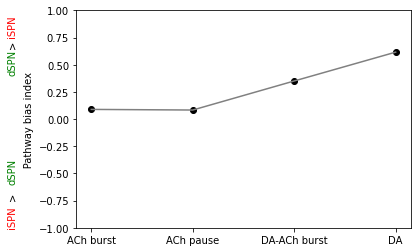

In [148]:
plot_bias_index(dSPN_iSPN,labels_v=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],exp_title='dSPN delays')

In [111]:
dSPN_iSPN

{0: 0.1780075433088243,
 1: 0.1665571616294349,
 2: 0.7009083066676028,
 3: 1.2314426578126407}

In [28]:
ratio_dSPN = ratio_spike_nonspike(kl,type_cell='dSPN')
ratio_dSPN

{0: {'spike': 265, 'pol': 4735, 'ratio': 0.0559662090813094},
 1: {'spike': 262, 'pol': 4738, 'ratio': 0.05529759392148586},
 2: {'spike': 402, 'pol': 4598, 'ratio': 0.08742931709438886},
 3: {'spike': 541, 'pol': 4459, 'ratio': 0.12132765193989684}}

In [78]:
per_dSPN = percentage_spike(kl,type_cell='dSPN',total=5000)
per_dSPN

{0: {'spike': 264, 'pol': 4736, 'percentage': 5.28},
 1: {'spike': 262, 'pol': 4738, 'percentage': 5.24},
 2: {'spike': 397, 'pol': 4603, 'percentage': 7.9399999999999995},
 3: {'spike': 535, 'pol': 4465, 'percentage': 10.7}}

In [ ]:
ratio_iSPN = ratio_spike_nonspike(kl,type_cell='iSPN')

In [59]:
per_iSPN = percentage_spike(kl,type_cell='iSPN',total=5000)
per_iSPN

{0: {'spike': 3612, 'pol': 1388, 'percentage': 72.24000000000001},
 1: {'spike': 3044, 'pol': 1956, 'percentage': 60.88},
 2: {'spike': 3628, 'pol': 1372, 'percentage': 72.56},
 3: {'spike': 2537, 'pol': 2463, 'percentage': 50.739999999999995}}

In [ ]:
ratio_FSN = ratio_spike_nonspike(kl,type_cell='FSN')

In [61]:
per_FSN = percentage_spike(kl,type_cell='FSN',total=500)
per_FSN

{0: {'spike': 56, 'pol': 44, 'percentage': 11.200000000000001},
 1: {'spike': 56, 'pol': 44, 'percentage': 11.200000000000001},
 2: {'spike': 77, 'pol': 23, 'percentage': 15.4},
 3: {'spike': 83, 'pol': 17, 'percentage': 16.6}}

In [57]:
def plot_percentage(percentages,labels_v=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],exp_title='dSPN'):
    fig, ax = plt.subplots()
    pos = 0
    for k, per in percentages.items():
        ax.bar([k], [per['percentage']],align='center', alpha=0.5, ecolor='black', capsize=10)
        
    ax.set_ylabel('Percentage spiking (total) %')
    ax.set_title('Ratio spike/pol')
    ax.set_xticks([*percentages.keys()])
    ax.set_xticklabels(labels_v)


    plt.tight_layout()
    plt.title(exp_title)
    plt.savefig(exp_title+'_ratio.svg')
    plt.show()

In [ ]:
def plot_ratio(ratios,labels_v=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],exp_title='dSPN'):
    fig, ax = plt.subplots()
    pos = 0
    for k, ratio in ratios.items():
        ax.bar([k], [ratio['ratio']],align='center', alpha=0.5, ecolor='black', capsize=10)
        
    ax.set_ylabel('Ratio spike/pol')
    ax.set_title('Ratio spike/pol')
    ax.set_xticks([*ratios.keys()])
    ax.set_xticklabels(labels_v)


    plt.tight_layout()
    plt.title(exp_title)
    plt.savefig(exp_title+'_ratio.svg')
    plt.show()

In [ ]:
plot_ratio(ratio_dSPN,exp_title='dSPN')

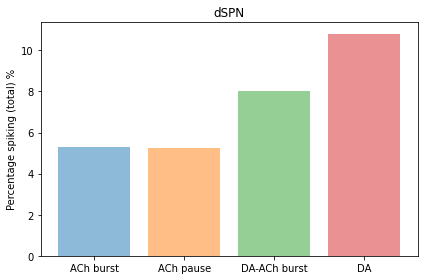

In [58]:
plot_percentage(per_dSPN,exp_title='dSPN')

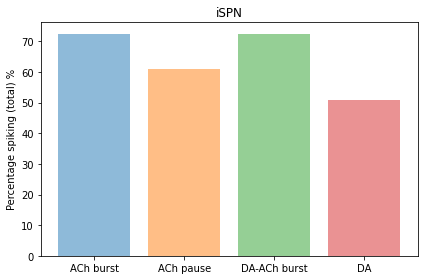

In [60]:
plot_percentage(per_iSPN,exp_title='iSPN')

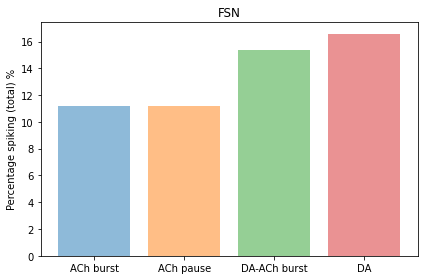

In [62]:
plot_percentage(per_FSN,exp_title='FSN')

In [ ]:
plot_ratio(ratio_iSPN,exp_title='iSPN')

In [ ]:
plot_ratio(ratio_FSN,exp_title='FSN')

In [ ]:
def mean_depolarisation(depol):
    average = dict()
    for k, session_data in depol.items():
        corrected = np.array(session_data)*1e3
        mean = corrected.mean()
        std = corrected.std()
        average.update({k : {'mean' : mean, 'std' : std}})
        
    return average

In [ ]:
def plot_membrane_potential(mean_depol,labels_v=['v1','v2'],exp_title=None):
    fig, ax = plt.subplots()
    pos = 0
    for k, average in mean_depol.items():
        ax.bar([k], [average['mean']],yerr=[average['std']], align='center', alpha=0.5, ecolor='black', capsize=10)
        
    ax.set_ylabel('Membrane potential change (mV)')
    ax.set_title('Membrane potential change (mV)')
    ax.set_xticks([*mean_depol.keys()])
    ax.set_xticklabels(labels_v)


    plt.tight_layout()
    plt.title(exp_title)
    plt.savefig(exp_title+'_mean_freuquency.svg')
    plt.show()
    
    

In [ ]:
mean_depol_dSPN = mean_depolarisation(depol_dSPN)

In [ ]:
plot_membrane_potential(mean_depol_dSPN,labels_v=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],exp_title='dSPN delays')

In [5]:
from snudda.utils.load import SnuddaLoad 
loadeddata =  SnuddaLoad(root + "network-neuron-positions.hdf5")

In [6]:
posInfo = loadeddata.data
cellpositions = posInfo['neuronPositions']

In [9]:
def ratio_spike_nonspike_position(obj_loaded_traces,cell_positions,type_cell='dSPN'):
    
    ratio = dict()
    
    data_dict = obj_loaded_traces.get_traces(neuronType=type_cell)
    for k, data in data_dict.items():
        
        depol = 0
        spike = 0
        depol_position = list()
        spike_position = list()
        
        for t, voltages in data.items():
            if max(voltages)<-0.04:
                depol=depol+1
                depol_position.append(cellpositions[t])
            else:
                spike=spike+1
                spike_position.append(cellpositions[t])
                
        ratio.update({k : {'spike': spike, 'pol' : depol, 'ratio': spike/depol,'spike_position' :spike_position,\
                           'depol_position' : depol_position }})
        
    return ratio

In [40]:
pos_ratio_dSPN = ratio_spike_nonspike_position(kl,cellpositions,type_cell='dSPN')
pos_ratio_iSPN = ratio_spike_nonspike_position(kl,cellpositions,type_cell='iSPN')

In [29]:
def plot_spike_pol_pos3d(pos_ratio,titles=None):
    
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import numpy as np
    
    for k, info in pos_ratio.items():
        
        fig = plt.figure(k)
        ax = fig.add_subplot(111, projection='3d')
        
        sp_pos = np.array(info['spike_position']).T
        dp_pos = np.array(info['depol_position']).T
        
        ax.scatter(sp_pos[0][::10],sp_pos[1][::10], sp_pos[2][::10], c='red')
        #ax.scatter(dp_pos[0][::10],dp_pos[1][::10], dp_pos[2][::10], c='blue')
        ax.set_title(titles[k])

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
    

        plt.show()

In [43]:
def plot_spike_pol_pos(pos_ratio,titles=None,color=None):

    import matplotlib.pyplot as plt
    import numpy as np
    
    for k, info in pos_ratio.items():
        
        fig = plt.figure(k)
        ax = fig.add_subplot(111)
        
        sp_pos = np.array(info['spike_position']).T
        dp_pos = np.array(info['depol_position']).T
        
        ax.scatter(sp_pos[0][::10]*1e6,sp_pos[1][::10]*1e6, c=color)
        #ax.scatter(dp_pos[0][::10],dp_pos[1][::10], dp_pos[2][::10], c='blue')
        ax.set_title(titles[k] + ' ' + str(info['spike']))

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')

    

        plt.show()

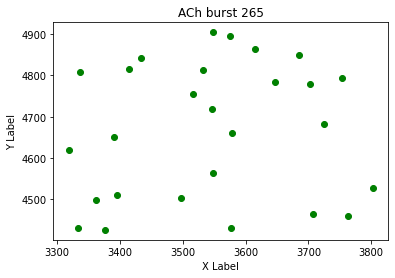

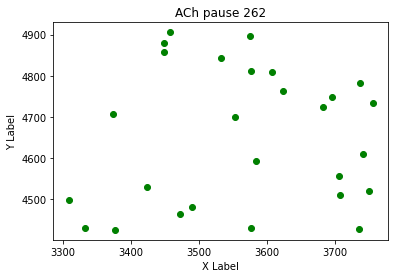

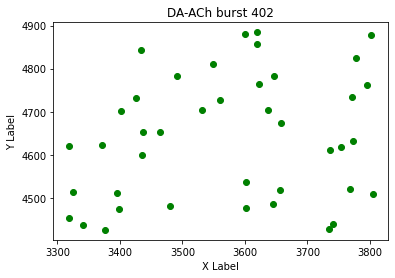

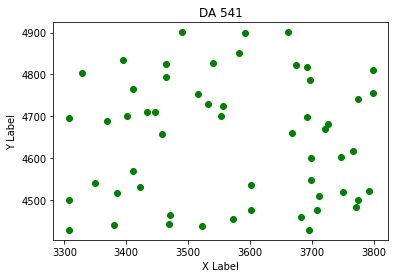

In [44]:
plot_spike_pol_pos(pos_ratio_dSPN,titles=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],color='green')

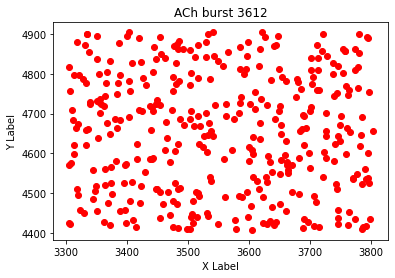

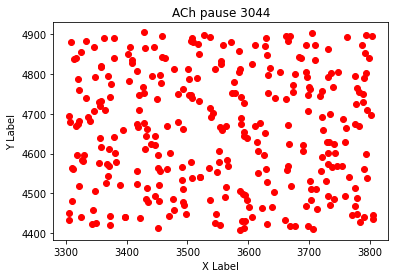

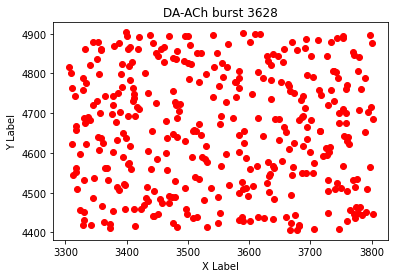

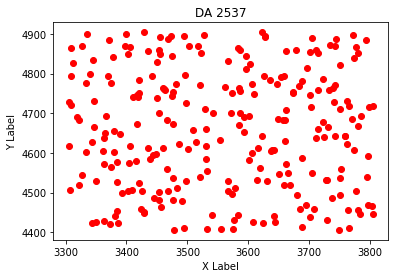

In [45]:
plot_spike_pol_pos(pos_ratio_iSPN,titles=['ACh burst', 'ACh pause','DA-ACh burst', 'DA'],color='red')